# Springboard Data Science Career Track Unit 4 Challenge - Tier 3 Complete

## Objectives
Hey! Great job getting through those challenging DataCamp courses. You're learning a lot in a short span of time. 

In this notebook, you're going to apply the skills you've been learning, bridging the gap between the controlled environment of DataCamp and the *slightly* messier work that data scientists do with actual datasets!

Here’s the mystery we’re going to solve: ***which boroughs of London have seen the greatest increase in housing prices, on average, over the last two decades?***


A borough is just a fancy word for district. You may be familiar with the five boroughs of New York… well, there are 32 boroughs within Greater London [(here's some info for the curious)](https://en.wikipedia.org/wiki/London_boroughs). Some of them are more desirable areas to live in, and the data will reflect that with a greater rise in housing prices.

***This is the Tier 3 notebook, which means it's not filled in at all: we'll just give you the skeleton of a project, the brief and the data. It's up to you to play around with it and see what you can find out! Good luck! If you struggle, feel free to look at easier tiers for help; but try to dip in and out of them, as the more independent work you do, the better it is for your learning!***

This challenge will make use of only what you learned in the following DataCamp courses: 
- Prework courses (Introduction to Python for Data Science, Intermediate Python for Data Science)
- Data Types for Data Science
- Python Data Science Toolbox (Part One) 
- pandas Foundations
- Manipulating DataFrames with pandas
- Merging DataFrames with pandas

Of the tools, techniques and concepts in the above DataCamp courses, this challenge should require the application of the following: 
- **pandas**
    - **data ingestion and inspection** (pandas Foundations, Module One) 
    - **exploratory data analysis** (pandas Foundations, Module Two)
    - **tidying and cleaning** (Manipulating DataFrames with pandas, Module Three) 
    - **transforming DataFrames** (Manipulating DataFrames with pandas, Module One)
    - **subsetting DataFrames with lists** (Manipulating DataFrames with pandas, Module One) 
    - **filtering DataFrames** (Manipulating DataFrames with pandas, Module One) 
    - **grouping data** (Manipulating DataFrames with pandas, Module Four) 
    - **melting data** (Manipulating DataFrames with pandas, Module Three) 
    - **advanced indexing** (Manipulating DataFrames with pandas, Module Four) 
- **matplotlib** (Intermediate Python for Data Science, Module One)
- **fundamental data types** (Data Types for Data Science, Module One) 
- **dictionaries** (Intermediate Python for Data Science, Module Two)
- **handling dates and times** (Data Types for Data Science, Module Four)
- **function definition** (Python Data Science Toolbox - Part One, Module One)
- **default arguments, variable length, and scope** (Python Data Science Toolbox - Part One, Module Two) 
- **lambda functions and error handling** (Python Data Science Toolbox - Part One, Module Four) 

## The Data Science Pipeline

This is Tier Three, so we'll get you started. But after that, it's all in your hands! When you feel done with your investigations, look back over what you've accomplished, and prepare a quick presentation of your findings for the next mentor meeting. 

Data Science is magical. In this case study, you'll get to apply some complex machine learning algorithms. But as  [David Spiegelhalter](https://www.youtube.com/watch?v=oUs1uvsz0Ok) reminds us, there is no substitute for simply **taking a really, really good look at the data.** Sometimes, this is all we need to answer our question.

Data Science projects generally adhere to the four stages of Data Science Pipeline:
1. Sourcing and loading 
2. Cleaning, transforming, and visualizing 
3. Modeling 
4. Evaluating and concluding 


### 1. Sourcing and Loading 

Any Data Science project kicks off by importing  ***pandas***. The documentation of this wonderful library can be found [here](https://pandas.pydata.org/). As you've seen, pandas is conveniently connected to the [Numpy](http://www.numpy.org/) and [Matplotlib](https://matplotlib.org/) libraries. 

***Hint:*** This part of the data science pipeline will test those skills you acquired in the pandas Foundations course, Module One. 

#### 1.1. Importing Libraries

In [2]:
# Let's import the pandas, numpy libraries as pd, and np respectively. 
import pandas as pd
import numpy as np
from collections import defaultdict

# Load the pyplot collection of functions from matplotlib, as plt 
import matplotlib.pyplot as plt

#### 1.2.  Loading the data
Your data comes from the [London Datastore](https://data.london.gov.uk/): a free, open-source data-sharing portal for London-oriented datasets. 

In [3]:
# First, make a variable called url_LondonHousePrices, and assign it the following link, enclosed in quotation-marks as a string:
# https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls

url_LondonHousePrices = "https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls"

# The dataset we're interested in contains the Average prices of the houses, and is actually on a particular sheet of the Excel file. 
# As a result, we need to specify the sheet name in the read_excel() method.
# Put this data into a variable called properties.  
properties = pd.read_excel(url_LondonHousePrices, sheet_name='Average price', index_col= 'Unnamed: 0', engine='openpyxl', parse_dates=True)

### 2. Cleaning, transforming, and visualizing
This second stage is arguably the most important part of any Data Science project. The first thing to do is take a proper look at the data. Cleaning forms the majority of this stage, and can be done both before or after Transformation.

The end goal of data cleaning is to have tidy data. When data is tidy: 

1. Each variable has a column.
2. Each observation forms a row.

Keep the end goal in mind as you move through this process, every step will take you closer. 



***Hint:*** This part of the data science pipeline should test those skills you acquired in: 
- Intermediate Python for data science, all modules.
- pandas Foundations, all modules. 
- Manipulating DataFrames with pandas, all modules.
- Data Types for Data Science, Module Four.
- Python Data Science Toolbox - Part One, all modules

**2.1. Exploring your data** 

Think about your pandas functions for checking out a dataframe. 

In [4]:
properties.head()

,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,Enfield,...,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,Unnamed: 47,England,Unnamed: 49,Unnamed: 50
NaT,E09000001,E09000002,E09000003,E09000004,E09000005,E09000006,E09000007,E09000008,E09000009,E09000010,...,E12000004,E12000005,E12000006,E12000007,E12000008,E12000009,NaN,E92000001,NaN,NaN
1995-01-01,91449,50460.2,93284.5,64958.1,71306.6,81671.5,120933,69158.2,79885.9,72514.7,...,45544.5,48527.5,56701.6,74435.8,64018.9,54705.2,NaN,53202.8,NaN,NaN
1995-02-01,82202.8,51085.8,93190.2,64787.9,72022.3,81657.6,119509,68951.1,80897.1,73155.2,...,46051.6,49341.3,56593.6,72777.9,63715,54356.1,NaN,53096.2,NaN,NaN
1995-03-01,79120.7,51269,92247.5,64367.5,72015.8,81449.3,120282,68712.4,81379.9,72190.4,...,45383.8,49442.2,56171.2,73896.8,64113.6,53583.1,NaN,53201.3,NaN,NaN
1995-04-01,77101.2,53133.5,90762.9,64277.7,72965.6,81124.4,120098,68610,82188.9,71442.9,...,46124.2,49455.9,56567.9,74455.3,64623.2,54786,NaN,53590.9,NaN,NaN


In [5]:
properties.columns

Index(['City of London', 'Barking & Dagenham', 'Barnet', 'Bexley', 'Brent',
       'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield', 'Greenwich',
       'Hackney', 'Hammersmith & Fulham', 'Haringey', 'Harrow', 'Havering',
       'Hillingdon', 'Hounslow', 'Islington', 'Kensington & Chelsea',
       'Kingston upon Thames', 'Lambeth', 'Lewisham', 'Merton', 'Newham',
       'Redbridge', 'Richmond upon Thames', 'Southwark', 'Sutton',
       'Tower Hamlets', 'Waltham Forest', 'Wandsworth', 'Westminster',
       'Unnamed: 34', 'Inner London', 'Outer London', 'Unnamed: 37',
       'NORTH EAST', 'NORTH WEST', 'YORKS & THE HUMBER', 'EAST MIDLANDS',
       'WEST MIDLANDS', 'EAST OF ENGLAND', 'LONDON', 'SOUTH EAST',
       'SOUTH WEST', 'Unnamed: 47', 'England', 'Unnamed: 49', 'Unnamed: 50'],
      dtype='object')

In [6]:
properties[['Unnamed: 47', 'Unnamed: 49', 'Unnamed: 50']].count()

Unnamed: 47    0
Unnamed: 49    0
Unnamed: 50    0
dtype: int64

In [7]:
properties.index.rename('Date', inplace=True)

In [8]:
properties = properties.iloc[1:]
properties.head()

,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,Enfield,...,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,Unnamed: 47,England,Unnamed: 49,Unnamed: 50
Date,,,,,,,,,,,,,,,,,,,,,
1995-01-01,91449,50460.2,93284.5,64958.1,71306.6,81671.5,120933,69158.2,79885.9,72514.7,...,45544.5,48527.5,56701.6,74435.8,64018.9,54705.2,NaN,53202.8,NaN,NaN
1995-02-01,82202.8,51085.8,93190.2,64787.9,72022.3,81657.6,119509,68951.1,80897.1,73155.2,...,46051.6,49341.3,56593.6,72777.9,63715,54356.1,NaN,53096.2,NaN,NaN
1995-03-01,79120.7,51269,92247.5,64367.5,72015.8,81449.3,120282,68712.4,81379.9,72190.4,...,45383.8,49442.2,56171.2,73896.8,64113.6,53583.1,NaN,53201.3,NaN,NaN
1995-04-01,77101.2,53133.5,90762.9,64277.7,72965.6,81124.4,120098,68610,82188.9,71442.9,...,46124.2,49455.9,56567.9,74455.3,64623.2,54786,NaN,53590.9,NaN,NaN
1995-05-01,84409.1,53042.2,90258,63997.1,73704,81542.6,119929,68844.9,82077.1,70630.8,...,45878,50369.7,56479.8,75432,64530.4,54698.8,NaN,53678.2,NaN,NaN


In [9]:
weird = properties.columns.str.match('^Unnamed')
weird_cols = properties.columns[weird]
print(weird_cols)

Index(['Unnamed: 34', 'Unnamed: 37', 'Unnamed: 47', 'Unnamed: 49',
       'Unnamed: 50'],
      dtype='object')


In [10]:
properties[weird_cols].count()

Unnamed: 34    0
Unnamed: 37    0
Unnamed: 47    0
Unnamed: 49    0
Unnamed: 50    0
dtype: int64

In [11]:
properties1 = properties.drop(weird_cols, axis=1)

In [12]:
properties1.columns

Index(['City of London', 'Barking & Dagenham', 'Barnet', 'Bexley', 'Brent',
       'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield', 'Greenwich',
       'Hackney', 'Hammersmith & Fulham', 'Haringey', 'Harrow', 'Havering',
       'Hillingdon', 'Hounslow', 'Islington', 'Kensington & Chelsea',
       'Kingston upon Thames', 'Lambeth', 'Lewisham', 'Merton', 'Newham',
       'Redbridge', 'Richmond upon Thames', 'Southwark', 'Sutton',
       'Tower Hamlets', 'Waltham Forest', 'Wandsworth', 'Westminster',
       'Inner London', 'Outer London', 'NORTH EAST', 'NORTH WEST',
       'YORKS & THE HUMBER', 'EAST MIDLANDS', 'WEST MIDLANDS',
       'EAST OF ENGLAND', 'LONDON', 'SOUTH EAST', 'SOUTH WEST', 'England'],
      dtype='object')

In [13]:
properties1.head()

,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,Enfield,...,NORTH EAST,NORTH WEST,YORKS & THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,England
Date,,,,,,,,,,,,,,,,,,,,,
1995-01-01,91449,50460.2,93284.5,64958.1,71306.6,81671.5,120933,69158.2,79885.9,72514.7,...,42076.4,43958.5,44803.4,45544.5,48527.5,56701.6,74435.8,64018.9,54705.2,53202.8
1995-02-01,82202.8,51085.8,93190.2,64787.9,72022.3,81657.6,119509,68951.1,80897.1,73155.2,...,42572,43925.4,44528.8,46051.6,49341.3,56593.6,72777.9,63715,54356.1,53096.2
1995-03-01,79120.7,51269,92247.5,64367.5,72015.8,81449.3,120282,68712.4,81379.9,72190.4,...,42369.7,44434.9,45200.5,45383.8,49442.2,56171.2,73896.8,64113.6,53583.1,53201.3
1995-04-01,77101.2,53133.5,90762.9,64277.7,72965.6,81124.4,120098,68610,82188.9,71442.9,...,42095.8,44267.8,45614.3,46124.2,49455.9,56567.9,74455.3,64623.2,54786,53590.9
1995-05-01,84409.1,53042.2,90258,63997.1,73704,81542.6,119929,68844.9,82077.1,70630.8,...,43266.5,44223.6,44831,45878,50369.7,56479.8,75432,64530.4,54698.8,53678.2


**2.2. Cleaning the data**

You might find you need to transpose your dataframe, check out what its row indexes are, and reset the index. You  also might find you need to assign the values of the first row to your column headings  . (Hint: recall the .columns feature of DataFrames, as well as the iloc[] method).

Don't be afraid to use StackOverflow for help  with this.

**2.3. Cleaning the data (part 2)**

You might we have to **rename** a couple columns. How do you do this? The clue's pretty bold...

**2.4.Transforming the data**

Remember what Wes McKinney said about tidy data? 

You might need to **melt** your DataFrame here. 

Remember to make sure your column data types are all correct. Average prices, for example, should be floating point numbers... 

**2.5. Cleaning the data (part 3)**

Do we have an equal number of observations in the ID, Average Price, Month, and London Borough columns? Remember that there are only 32 London Boroughs. How many entries do you have in that column? 

Check out the contents of the London Borough column, and if you find null values, get rid of them however you see fit. 

In [14]:
properties_buroughs = properties.iloc[:, 1:33]
properties_buroughs = properties_buroughs.astype(float)
properties_buroughs.info()
properties_buroughs.dtypes


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 310 entries, 1995-01-01 to 2020-10-01
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Barking & Dagenham    310 non-null    float64
 1   Barnet                310 non-null    float64
 2   Bexley                310 non-null    float64
 3   Brent                 310 non-null    float64
 4   Bromley               310 non-null    float64
 5   Camden                310 non-null    float64
 6   Croydon               310 non-null    float64
 7   Ealing                310 non-null    float64
 8   Enfield               310 non-null    float64
 9   Greenwich             310 non-null    float64
 10  Hackney               310 non-null    float64
 11  Hammersmith & Fulham  310 non-null    float64
 12  Haringey              310 non-null    float64
 13  Harrow                310 non-null    float64
 14  Havering              310 non-null    float64
 15  Hill

Barking & Dagenham      float64
Barnet                  float64
Bexley                  float64
Brent                   float64
Bromley                 float64
Camden                  float64
Croydon                 float64
Ealing                  float64
Enfield                 float64
Greenwich               float64
Hackney                 float64
Hammersmith & Fulham    float64
Haringey                float64
Harrow                  float64
Havering                float64
Hillingdon              float64
Hounslow                float64
Islington               float64
Kensington & Chelsea    float64
Kingston upon Thames    float64
Lambeth                 float64
Lewisham                float64
Merton                  float64
Newham                  float64
Redbridge               float64
Richmond upon Thames    float64
Southwark               float64
Sutton                  float64
Tower Hamlets           float64
Waltham Forest          float64
Wandsworth              float64
Westmins

In [15]:
properties_long = properties_buroughs.resample('A').mean().reset_index()
properties_long = properties_long.melt(id_vars='Date')
properties_long.columns = ['Date', 'Borough', 'Avg Price']
properties_long = properties_long.set_index(['Borough','Date'])
properties_long.head()

Avg Price
Borough            Date                    
Barking & Dagenham 1995-12-31  51817.969390
                   1996-12-31  51718.192690
                   1997-12-31  55974.262309
                   1998-12-31  60285.821083
                   1999-12-31  65320.934441

**2.6. Visualizing the data**

To visualize the data, why not subset on a particular London Borough? Maybe do a line plot of Month against Average Price?

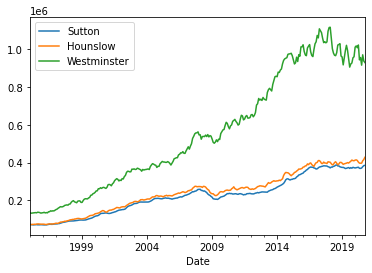

In [16]:
sutton = properties_buroughs[['Sutton','Hounslow', 'Westminster']]
sutton.plot()
plt.show()

To limit the number of data points you have, you might want to extract the year from every month value your *Month* column. 

To this end, you *could* apply a ***lambda function***. Your logic could work as follows:
1. look through the `Month` column
2. extract the year from each individual value in that column 
3. store that corresponding year as separate column. 

Whether you go ahead with this is up to you. Just so long as you answer our initial brief: which boroughs of London have seen the greatest house price increase, on average, over the past two decades? 

**3. Modeling**

Consider creating a function that will calculate a ratio of house prices, comparing the price of a house in 2018 to the price in 1998.

Consider calling this function create_price_ratio.

You'd want this function to:
1. Take a filter of dfg, specifically where this filter constrains the London_Borough, as an argument. For example, one admissible argument should be: dfg[dfg['London_Borough']=='Camden'].
2. Get the Average Price for that Borough, for the years 1998 and 2018.
4. Calculate the ratio of the Average Price for 1998 divided by the Average Price for 2018.
5. Return that ratio.

Once you've written this function, you ultimately want to use it to iterate through all the unique London_Boroughs and work out the ratio capturing the difference of house prices between 1998 and 2018.

Bear in mind: you don't have to write a function like this if you don't want to. If you can solve the brief otherwise, then great! 

***Hint***: This section should test the skills you acquired in:
- Python Data Science Toolbox - Part One, all modules

In [17]:
properties_buroughs.head()
properties_buroughs = properties_buroughs.resample('A').mean()
properties_2000 = properties_buroughs.loc['2000']
properties_2020 = properties_buroughs.loc['2020']
properties_2000_2020 = pd.concat([properties_2000, properties_2020], axis=0)
properties_2000_2020.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2 entries, 2000-12-31 to 2020-12-31
Freq: A-DEC
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Barking & Dagenham    2 non-null      float64
 1   Barnet                2 non-null      float64
 2   Bexley                2 non-null      float64
 3   Brent                 2 non-null      float64
 4   Bromley               2 non-null      float64
 5   Camden                2 non-null      float64
 6   Croydon               2 non-null      float64
 7   Ealing                2 non-null      float64
 8   Enfield               2 non-null      float64
 9   Greenwich             2 non-null      float64
 10  Hackney               2 non-null      float64
 11  Hammersmith & Fulham  2 non-null      float64
 12  Haringey              2 non-null      float64
 13  Harrow                2 non-null      float64
 14  Havering              2 non-null      float64

In [18]:
# Param burough should be a slice of melted dataframe (properties_long) sliced using boolean series
def calcRatio(buroughdf):
    price_2000 = float(buroughdf.loc['2000'])
    price_2020 = float(buroughdf.loc['2020'])

    return price_2020 / price_2000 # positive number = 2020 price is greater

In [19]:
ratios = properties_2000_2020.apply(calcRatio).sort_values(ascending=False)

In [20]:
ratios

Hackney                 4.346619
Waltham Forest          4.323095
Newham                  4.026703
Lewisham                3.933575
Barking & Dagenham      3.882201
Haringey                3.802267
Westminster             3.731357
Greenwich               3.593290
Lambeth                 3.551997
Southwark               3.543386
Kensington & Chelsea    3.505897
Islington               3.444060
Merton                  3.434053
Brent                   3.422391
Camden                  3.404880
Redbridge               3.383502
Havering                3.373598
Wandsworth              3.314611
Bexley                  3.311958
Tower Hamlets           3.260151
Enfield                 3.225531
Croydon                 3.152070
Ealing                  3.140492
Barnet                  3.128194
Hillingdon              3.116429
Kingston upon Thames    3.030141
Hounslow                2.988931
Richmond upon Thames    2.983401
Sutton                  2.976463
Harrow                  2.951550
Bromley   

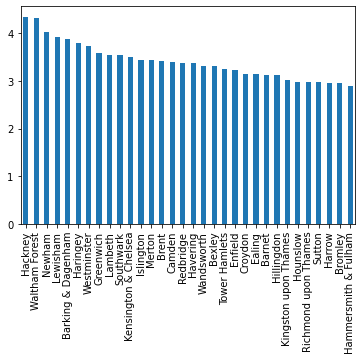

In [21]:
# Bar plot of ratios
ratios.plot(kind='bar')
plt.show()

In [24]:
properties1.loc[:, 'NORTH EAST':'SOUTH WEST']

,NORTH EAST,NORTH WEST,YORKS & THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST
Date,,,,,,,,,
1995-01-01,42076.4,43958.5,44803.4,45544.5,48527.5,56701.6,74435.8,64018.9,54705.2
1995-02-01,42572,43925.4,44528.8,46051.6,49341.3,56593.6,72777.9,63715,54356.1
1995-03-01,42369.7,44434.9,45200.5,45383.8,49442.2,56171.2,73896.8,64113.6,53583.1
1995-04-01,42095.8,44267.8,45614.3,46124.2,49455.9,56567.9,74455.3,64623.2,54786
1995-05-01,43266.5,44223.6,44831,45878,50369.7,56479.8,75432,64530.4,54698.8
...,...,...,...,...,...,...,...,...,...
2020-06-01,129200,169091,168421,199121,202478,291767,478038,322662,259599
2020-07-01,131272,171624,169181,201103,204203,293858,484709,326941,265373
2020-08-01,132248,174483,172266,202542,205878,297786,492084,331706,266429


## Going further: ##
At this point I wanted to make a map of London and shade different buroughs by their ratio of increase, because I felt like that would be more informative than just a list and allowed us to see if their geography had anything to do with it. I spent a while putting this together for no reason other than I was curious.

In [26]:
import geopandas as gpd


In [41]:
# set the filepath and load in a shapefile
fp = "London_Borough_Excluding_MHW.shp"
map_df = gpd.read_file(fp)
# check data type so we can see that this is not a normal dataframe, but a GEOdataframe
map_df

,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry
0,Kingston upon Thames,E09000021,3726.117,0.000,F,None,None,"POLYGON ((516401.600 160201.800, 516407.300 16..."
1,Croydon,E09000008,8649.441,0.000,F,None,None,"POLYGON ((535009.200 159504.700, 535005.500 15..."
2,Bromley,E09000006,15013.487,0.000,F,None,None,"POLYGON ((540373.600 157530.400, 540361.200 15..."
3,Hounslow,E09000018,5658.541,60.755,F,None,None,"POLYGON ((521975.800 178100.000, 521967.700 17..."
4,Ealing,E09000009,5554.428,0.000,F,None,None,"POLYGON ((510253.500 182881.600, 510249.900 18..."
5,Havering,E09000016,11445.735,210.763,F,None,None,"POLYGON ((549893.900 181459.800, 549894.600 18..."
6,Hillingdon,E09000017,11570.063,0.000,F,None,None,"POLYGON ((510599.800 191689.500, 510615.200 19..."
7,Harrow,E09000015,5046.330,0.000,F,None,None,"POLYGON ((510599.800 191689.500, 510660.000 19..."
8,Brent,E09000005,4323.270,0.000,F,None,None,"POLYGON ((525201.000 182512.600, 525181.500 18..."
9,Barnet,E09000003,8674.837,0.000,F,None,None,"POLYGON ((524579.900 198355.200, 524594.300 19..."


<AxesSubplot:>

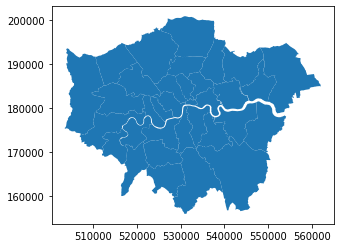

In [42]:
map_df.plot()

In [49]:
ratio_df = pd.DataFrame(ratios)
ratio_df.index.name = 'Boroughs'
ratio_df.columns = ['price']
ratio_df.index = ratio_df.index.str.replace('&', 'and')
ratio_df

,price
Boroughs,
Hackney,4.346619
Waltham Forest,4.323095
Newham,4.026703
Lewisham,3.933575
Barking and Dagenham,3.882201
Haringey,3.802267
Westminster,3.731357
Greenwich,3.593290
Lambeth,3.551997


In [51]:
# Join the dataframes together
ratio_df.head()
merged = map_df.set_index('NAME').join(ratio_df)

(500648.7349999999, 564876.965, 153596.645, 203188.055)

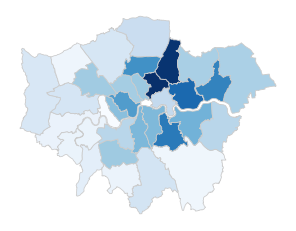

In [53]:
# create map
merged.plot(column='price', cmap='Blues', linewidth=0.8, edgecolor='0.8').axis('off')

### 4. Conclusion
What can you conclude? Type out your conclusion below. 

Look back at your notebook. Think about how you might summarize what you have done, and prepare a quick presentation on it to your mentor at your next meeting. 

We hope you enjoyed this practical project. It should have consolidated your data hygiene and pandas skills by looking at a real-world problem involving just the kind of dataset you might encounter as a budding data scientist. Congratulations, and looking forward to seeing you at the next step in the course! 

## Steps Taken: ##
1. Read in file from excel, setting index as the column with the dates and making it a DateTimeIndex, renamed 'Date'
2. Drop columns that didn't appear to contain any data (cleaning)
3. Dropped more columns so I was left with just the 32 boroughs
4. Following the prompt, melted the dataframe into a long form (but didn't end up using this one further)
5. Set the numerical data to be float type
6. Visualized a couple of boroughs' prices over time (Fig 1)
7. Resampled to yearly and made a separate dataframe containing just 2000 and 2020 data
8. Created the `calcRatio()` function and applied it on my dataframe to produce a series indexed by borough containing the ratio of increase in average price from 2000 to 2020. Sorted in descending so boroughs of interest were at the top. (Fig 2)
9. Plotted a bar graph showing all the boroughs and the factors by which they increased (not that informative)
10. Used geopandas to create a map of London shaded with darker shades being a higher increase (geographical data from here: https://data.london.gov.uk/dataset/statistical-gis-boundary-files-london)

## Conclusion: ##
The 2 boroughs with the highest increase in avg price over the last two decades were Hackney and Waltham Forest (the two darkest regions on the map in Figure 3). The map also seems to indicate that boroughs in the northeast of London have had a higher increase on average than the rest of the city, highlighting Northeast London as the fastest growing area of London in the last two decades.